## Predicting Employee Churn with Logistic Regression

<img src='../images/cover.webp'>

## **`CHURN`** means .... 


- **`Churn`** is a business term which refers to an event when customers leave/cease paying for a product/service. 

- Customer is **churned** once a particular amount of time has elapsed since the customer's last interaction with the service/product.

- Results in direct (customer leaves the service) and indirect (resources to find new customers) loss of revenue.

- **`Churn prediction`** is the *ability to predict that customer is at a high risk of churning*.

- A critical figure in businesses, as acquiring new customers is a lot more costly than retaining existing ones and therefore is a key business goal.

## **`Employee Churn`** 

- **Employee Churn** is where ***customer*** is the ***employee*** of the organization. 

- People with niche skills are important to replace

- Disrupts ongoing workflow of workers

- Very costly for organizations, where costs include but not limited to: separation, vacancy, recruitment, training and replacement.

- **`Employee Churn prediction`** helps management design better strategies to reduce downturn of revenue 

## Agenda

- Exploratory Data Analysis
- Data preprocessing
- Introduction to classification
- **Solving classification problems with linear regression**
- Building blocks of Logistic Regression
    - Odds ratio
    - **Sigmoid**
- Cost function intuition
- Model building with scikit-learn
- Evaluation metrics

## Pre-requisites
- Python knowledge
- Basic statistics (measures of central tendancy, stndard deviation etc.)

Good to have:
- Working knowledge of linear regression
- Gradient descent and linear algebra
- Probability and distributions

## Session takeaways
- Performing exploratory analysis of data
- How to preprocess data
- Nuts and bolts of logistic regression
- How to chose evaluation metric

## Problem statement

- Very famous Kaggle dataset (unfortunately its no longer there on Kaggle)
- 14,999 observations and 10 attributes
- **Goal** is to predict the probability with which an employee will terminate his service to the company

**Feature description**

- **satisction_level**: Level of satisfaction {0–1}.
- **last_evaluation**: Last performance evaluation by the employer {0–1}.
- **number_project**: Number of projects the employee is/was working on at the time of survey.
- **average_montly_hours**: Average monthly hours at workplace
- **time_spend_company**: Number of years spent in the company.
- **Work_accident**: Whether the employee had a workplace accident. (`0`:No, `1`:Yes)
- **left**: Whether the employee left the workplace or not {`0`:No, `1`:Yes}.
- **promotion_last_5years**: Whether the employee was promoted in the last five years {`0`:No, `1`:Yes}.
- **Departments**: Department the employee works for.
- **salary**: Relative level of salary {`low`, `medium`, `high`}.

## Exploratory Data Analysis (EDA)

- First load the data
- Perform basic level analysis on data with the help of statistical methods
- Look at data from various angles without making any assumptions

## Load data with `pandas`

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

# load data
df = pd.read_csv('../data/churn.csv')

# first five observations
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Shape of data and data types of features

In [2]:
# shape of data
print(df.shape)
print('='*50)

# information about data types of features
df.info()

(14999, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Departments              14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Any missing values in data?

In [3]:
# check for presence of null values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

## Why Employees leave in the first place?

In [4]:
# mean attribute values across attributes for employees who left vs employees who are at the company
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [5]:
# number of employees across different salary brackets
pd.DataFrame(df.groupby(['left', 'salary'])['salary'].count())

salary
left salary        
0    high      1155
     low       5144
     medium    5129
1    high        82
     low       2172
     medium    1317

Employees leave because of: 
- Lower satisfaction levels
- Lower promotion rates
- Spend more time on their job
- Lesser salary

##  Feature-wise bar-chart of Employees leaving vs Employees staying

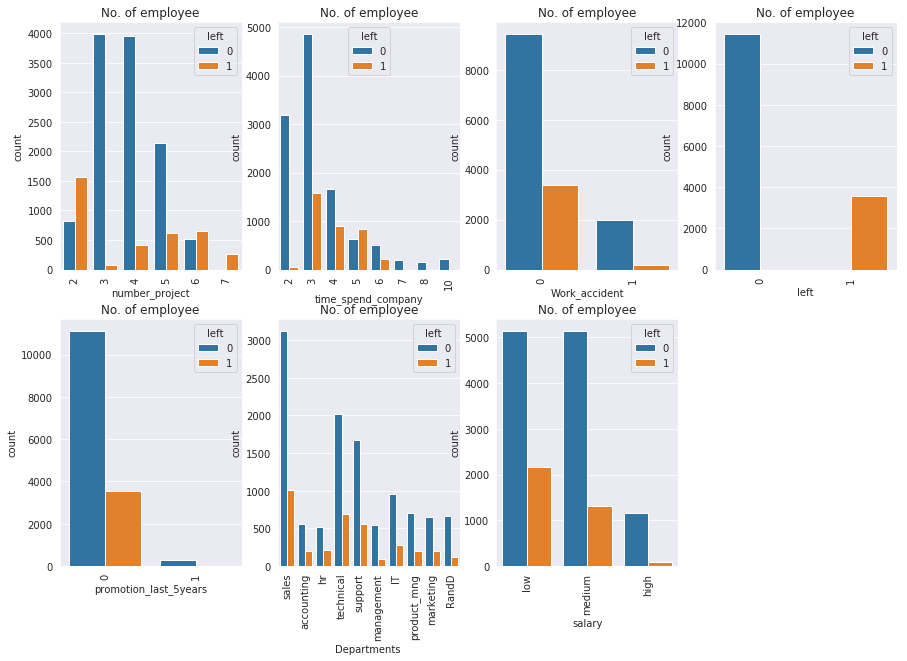

In [6]:
# list of features
features=['number_project','time_spend_company','Work_accident','left', 
          'promotion_last_5years','Departments ','salary']

# initialize figure
fig = plt.subplots(figsize=(15,10))

for i, j in enumerate(features):
    plt.subplot(2, 4, i+1)
    sns.countplot(x=j,data = df, hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

## Key takeaways

- **Less projects**: Employees with less number of projects (less than 3) are prone to leave.
- **Fatigue**: Employees with more than 5 projects are also prone to leave the organization.
- **Loyalty**: Employees with less than 3 years experience stay (time of learning) and those with more than 5 years are extremely loyal.
- **Promotion**: No promotion increases the chances of leaving
- **Departments**: `Sales`, `Technical` and `Support` teams have the highest number of employees leaving
- **Salary**: Employees with salary brackets in `low` and `medium` have higher chances of leaving

## Data Preprocessing

- Precursor to modelling
- Make data format consistent
- Generally includes missing value imputation, outlier removal and other data transformation techniques

In [7]:
# import LabelEncoder
from sklearn import preprocessing

# creating labelEncoder object
le = preprocessing.LabelEncoder()

# Converting string labels into numbers
df['salary']=le.fit_transform(df['salary'])
df['Departments ']=le.fit_transform(df['Departments '])
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


## Split into features and target

In [8]:
# Spliting data into features and targets
X = df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments ', 'salary']]
y = df['left']

## Split into training and test sets

In [9]:
# import train_test_split function
from sklearn.model_selection import train_test_split

# split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)  
# 70% training and 30% test

## What is Classification?

- Group data according to some criteria based on attributes. Ex:
    - Predict genre of movie as **horror/suspense/thriller** based on plot, duration, actors etc.  
    - Classify emails as **spam/ham email** based on email subject, email message, attachments etc.
- `Different from regression`: Predict categories (discrete value) not continuous values. 
- Supervised learning mode; unsupervised version similar to classification also exists (clustering).

**Supervised vs Unsupervised learning**

<img src='../images/supervised.png'>

- **`Unsupervised`**: We don't know about the targets of data points and goal is to categorize data into a finite number of categories based on given features
- **`Supervised`**: Information about true targets are known (shown by colored points) and goal is predict that information (number/category) on unseen data

## Can we solve classification with linear regression?

- Technically yes!
    - Set a threshold to demarcate boundary between classes of the target variable
- One reason is target value in classification is discrete valued (ex: 0/1, male/female) and not continuous.
- Not used because the decision boundary is highly unstable (prone to outliers)

|Without outlier | With outlier|
| --- | --- |
|<img src='../images/1.png'> | <img src='../images/2.png'> |

## Solving with logistic regression

- First round up values between 0 and 1. How to do it? -----> **Sigmoid**

- Sigmoid value represents the probability that the target has a value of 1


<img src='../images/sigmoid.png' align='center'>

## Is sigmoid stable?

- Max. value = 1
- Min. value = 1

<img src='../images/sig.png'>

## Odds and Odds ratio

For binary outcomes, if **`p`** is the probability of success then probability of failure is **`(1-p)`**

Odds ratio = $\mathbf{\frac{p}{1-p}}$

**Plot of odds ratio vs probability of success (p)**

<img src='../images/Odd.png' align='left'>

## Log Odds ratio

Turns out it is very hard to work with odds ratio, so we take logarithm of odds ratio. 

<img src='../images/log.png'>

## How did we arrive at the sigmoid?

$\text{logit(p)} = log(\frac{p}{1-p}) = \theta_0 + \theta_1x_1 + \theta_2x_2 + .... + \theta_nx_n$

- Right hand side of above equation looks pretty familiar with that of a sraight line

> $$ p = \frac{e^{\theta_0 + \theta_1x_1 + \theta_2x_2 + .... + \theta_nx_n}}{1 + e^{\theta_0 + \theta_1x_1 + \theta_2x_2 + .... + \theta_nx_n}}$$

> $$ p = \frac{1}{1 + e^-({\theta_0 + \theta_1x_1 + \theta_2x_2 + .... + \theta_nx_n})} $$ which is the sigmoid function

## Finding optimal parameters

- Now aim is to find the best fit parameters ($\theta_0$, $\theta_1$, ... ) for the model.

- Use MLE (Maximum Likelihood Estimation) technique to find optimal paramters.

- MLE represents the likelihood of observing training data

Ex: Assume we have a labeled example($x_i, y_i$) in training data and we found specific parameter values (i.e. $\theta\text{s}$). If we now apply our sigmoid function to it, we will get some value of $p$ ($0<= p <= 1$) as output. If$y_i$ is the positive class,the likelihood of $y_i$ being the positive class, according to our model, is given by $p$. Similarly, if $y_i$ is the negative class, the likelihood of it being the negative class is given by $1−p$.

## Intuition behind cost function

$\mathbf{\text{Let } h_\theta(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + .... + \theta_nx_n}$ where $x_i$ are the features and let $y_i$ are the targets (0, 1)

$\text{Goal is to maximize: } \mathbf{\prod_{i=1}^{m}{h_\theta(x)^{y_i}(1-h_\theta(x))^{1-y_i}}}$

We take log of the above expression to make calculation more simple and what we arrive at after that is called the **Cost function**, which is given by: $\mathbf{J(\theta)  = -\frac{1}{m}\sum_{i=1}^{m}[y_i\ln h_\theta(x_i) + (1-y_i) \ln (1-h_\theta(x_i))]}$

**Case I**:  $y = 1$ 

The cost function becomes  $J(\theta) = -\frac{1}{m}\sum_{i=1}^{m} \ln h_\theta(x_i) $, since $ (1 - y_i) = 0$ 

**Case II**:  $y = 0$ **

Now, this cost function becomes  $J(\theta) = -\frac{1}{m} \sum_{i=1}^{m}(1 - y_i) \ln (1 - h_\theta(x_i))$ 

<img src='../images/cost.png'>


## Model building with scikit-learn

Time to build the model with scikit-learn

In [10]:
# Model building

# import packages
from sklearn.linear_model import LogisticRegression

# initialize Logistic Regression model
logreg = LogisticRegression(random_state=2, class_weight={0:0.24, 1:0.76})

# Fit model on training data
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

/home/bick23/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Evaluation metrics
- **Accuracy**:
- **Confusion matrix**:
- **Precision**:
- **Recall**: 
- **ROC-AUC score**: 

In [11]:
# Evaluate predictions

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print('='*20)

print(accuracy_score(y_test, y_pred))
print('='*20)

print(precision_score(y_test, y_pred))
print('='*20)

print(recall_score(y_test, y_pred))
print('='*20)

print(roc_auc_score(y_test, y_pred))

[[2083  734]
 [ 190  743]]
0.7536
0.5030467163168585
0.7963558413719185
0.7678974805013657


## More things to try out
- Check for multicollinearity
- Undersampling and oversampling
- Using other classifiers

## Need to be covered:
- Weight update and gradient descent intuition
- Explaination of evaluation metrics
- Addition of reference articles